<a href="https://colab.research.google.com/github/denpetrov/01_03_natural-language-processing-tensorflow/blob/master/w03_Course_4_Week_3_Lesson_1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single Layer LSTM

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.0.0-beta1


In [2]:
!pip install tensorflow==2.0.0-beta1

In [0]:
if tf.__version__.split('.')[0] == '1':
  print('Old version of TF. Install tensorflow==2.0.0-beta1')
  !pip install tensorflow==2.0.0-beta1

In [4]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.0.0-beta1


In [5]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

W0801 11:10:34.350614 139669507131264 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.


In [0]:
tokenizer = info.features['text'].encoder

In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)
test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10


W0801 11:10:37.151139 139669507131264 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


391/391 [==============================] - 1503s 4s/step - loss: 0.5550 - accuracy: 0.7189 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 1313s 3s/step - loss: 0.3788 - accuracy: 0.8446 - val_loss: 0.4193 - val_accuracy: 0.8395
Epoch 3/10
391/391 [==============================] - 1327s 3s/step - loss: 0.2892 - accuracy: 0.8879 - val_loss: 0.3982 - val_accuracy: 0.8290
Epoch 4/10
391/391 [==============================] - 1296s 3s/step - loss: 0.2432 - accuracy: 0.9100 - val_loss: 0.4263 - val_accuracy: 0.8420
Epoch 5/10
391/391 [==============================] - 1293s 3s/step - loss: 0.4011 - accuracy: 0.8147 - val_loss: 0.6357 - val_accuracy: 0.6375
Epoch 6/10
391/391 [==============================] - 1310s 3s/step - loss: 0.4815 - accuracy: 0.7720 - val_loss: 0.5878 - val_accuracy: 0.7288
Epoch 7/10
391/391 [==============================] - 1327s 3s/step - loss: 0.4289 - accuracy: 0.8049 - val_loss: 0.5168 - val_accuracy: 0.

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

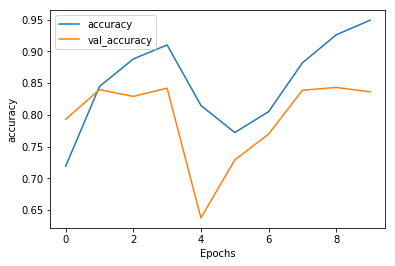

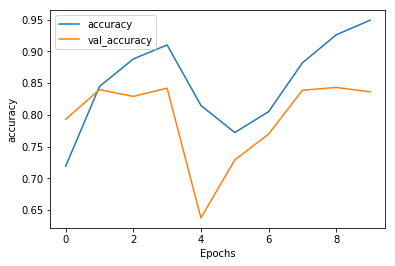

In [13]:
plot_graphs(history, 'accuracy')

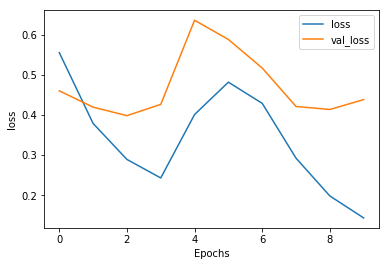

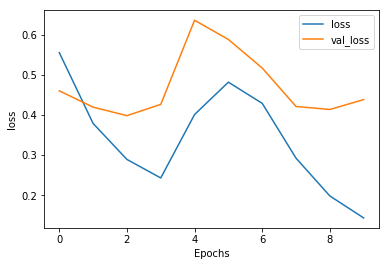

In [14]:
plot_graphs(history, 'loss')